# FastApi

## 1

> Веб-технологии

В домашней работе нам предстоит сделать несколько простых веб-сервисов. Давайте для начала убедимся, что мы помним основы.

Какие утверждения про веб запросы верны?

```
- POST запрос используется, чтобы обновить информацию на сервере
- GET запрос обычно используется, чтобы запросить информацию с сервера
- GET запрос обычно не имеет body
```

## 2

> Веб запросы

Теперь поговорим об ошибках. Сопоставьте статус коды с их общим значением. Звездочка (*) означает любое число, т.е. 50* означает 501, 502 и т.д.

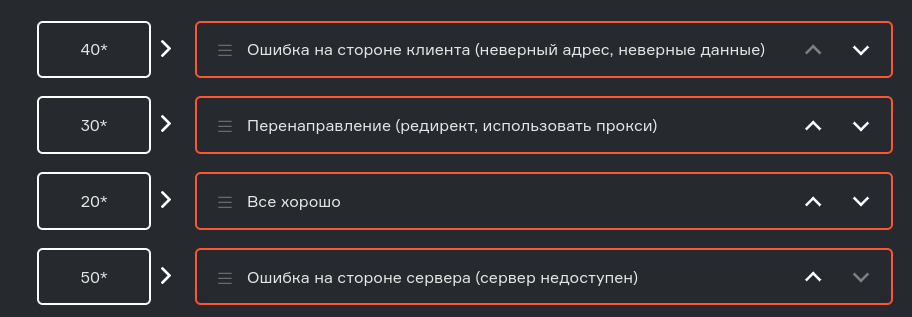

## 3

> Простой endpoint

- Во всех заданиях на написание кода для успешной сдачи необходимо писать код в файле с названием app.py и создавать экземпляр приложения через app = FastAPI() (т.е. с именем app).

- Напишите endpoint GET /, т.е. который будет слушать корень "/" сайта и метод GET. Endpoint должен возвращать строку "hello, world".

- Используйте для этого FastAPI. 

- Вы можете проверить свой код на работоспособность через Postman. Запустите веб-сервер через команду в консоли:
```
uvicorn app:app --reload --port 8899
```
- Затем в Postman сделайте запрос GET на http://localhost:8899/. В ответе должна придти строка "hello, world" и status code 200.

- Отправьте файл app.py в поле ниже.

In [ ]:
from fastapi import FastAPI

app = FastAPI()

@app.get("/")
def hello():
    return 'hello, world'

## 4

> GET: принимаем параметры

- Напишите endpoint GET /, который будет принимать два числа на вход и возвращать их сумму.

- Пример использования: `GET /?a=5&b=3 вернет строку 8 и status_code=200`

- Чтобы проверить у себя работоспособность, 
    - запустите сервис через uvicorn app:app --reload --port 8899, 
    - затем в Postman зайдите на http://localhost:8899/?a=5&b=3, должно вернуться 8.
    - Вы можете также зайти по этой же ссылке в браузере и увидеть одну надпись 8 на белом фоне.

- Для сдачи задания отправьте файл app.py

In [ ]:
@app.get("/")
def sum_two(a: int, b: int) -> int:
    return a + b

## 5
> GET: принимаем сложные типы данных

Потренируемся в валидации данных через указание типа переменной.

- Напишите endpoint GET /sum_date, который будет принимать два параметра: current_date и offset. 

- current_date будет иметь вид YYYY-MM-DD - это дата в формате год-месяц-день (например, 2022-01-01). offset будет целым числом (может быть отрицательным).

- Ваш endpoint должен провалидировать, что current_date имеет тип datetime.date (используйте подсказку типов, когда будете указывать список аргументов функции!) 

- и валидировать, что offset имеет тип int. 

- Затем endpoint должен прибавить к дате current_date дни в количестве offset и вернуть ответом строку в формате год-месяц-день.

Пример использования:

```
GET /sum_date?current_date=2008-09-15&offset=2 вернет "2008-09-17"
```
Как обычно, вы можете использовать Postman для проверки кода на этапе разработки. 
```
Пример GET запроса: localhost:8899/sum_date?current_date=2008-01-15&offset=2,
```
должно вернуть "2008-01-17" и status code 200.

- Отправьте файл app.py с реализацией этого endpoint.

In [ ]:
from fastapi import FastAPI
from datetime import timedelta, date

app = FastAPI()


@app.get("/sum_date")
def sum_date(current_date: date, offset: int):
    #current_date = datetime.strptime(current_date, '%Y-%m-%d').date()
    result = current_date + timedelta(days=offset)
    return result

## 6

> POST: эмулируем регистрацию (1/2)

В этом задании потренируемся в валидации данных через модели (BaseModel из pydantic).

В следующем задании нужно будет написать endpoint POST /user/validate, который будет принимать на вход JSON в формате:
```json
{
  "name": <строка>,
  "surname": <строка>,
  "age": <число>,
  "registration_date": <дата в формате YYYY-MM-DD>
}
```
Мы обязательно будем валидировать входные данные: ни один из ключей в JSON не должен быть пропущен и все они должны иметь тип, как указано выше. Для валидации воспользуемся моделями pydantic.

В этом задании нужно написать класс User, который будет наследоваться от BaseModel из pydantic. Опишите в нем поля name, surname, age, registration_date, укажите их типы (через : - как вот name: str).

Как обычно, пишите код в файле app.py. Для сдачи задания отправьте этот файл с описанием класса User.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from datetime import date
app = FastAPI()

class User(BaseModel):
    name: str
    surname: str
    age: int
    registration_date: date

    class Config:
        orm_mode = True

## 7

> POST: эмулируем регистрацию (2/2)

Теперь, когда у нас есть описание модели, можно приступить к написанию endpoint.

- Напишите endpoint POST /user/validate, который будет принимать JSON в формате из прошлого задания и валидировать его. 
- Для валидации укажите в функции, что она принимает аргумент типа User (возьмите этот класс из прошлого пункта). 
- Наконец, верните в endpoint строку "Will add user: <имя> <фамилия> with age <возраст>"

Пример запроса: POST /user/validate с телом
```json
{
  "name": "Aleksei",
  "surname": "Kozharin",
  "age": 77,
  "registration_date": "2022-01-01"
}
```
должно вернуть status code 200 и текст "Will add user: Aleksei Kozharin with age 77"

При этом запрос
```json
{
  "name": "Aleksei",
  "surname": "Another"
}

```
Должен вернуть ошибку валидации: status code 422 и JSON с подробным текстом (оставьте тот, что FastAPI выдает по умолчанию). Отправьте app.py с реализацией endpoint и класса User.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from datetime import date

app = FastAPI()


class User(BaseModel):
    name: str
    surname: str
    age: int
    registration_date: date

    class Config:
        orm_mode = True


@app.post("/user/validate")
def validation(json_file: User):
    return f'Will add user: {json_file.name} {json_file.surname} with age {json_file.age}'